<a href="https://colab.research.google.com/github/Atul721/WeatherAI/blob/main/Thesis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/GlobalLandTemperaturesByCity.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
240257,1940-12-01,18.074,0.283,Ambato,Ecuador,0.80S,77.95W
240258,1941-01-01,17.435,0.180,Ambato,Ecuador,0.80S,77.95W
240259,1941-02-01,18.011,0.383,Ambato,Ecuador,0.80S,77.95W
240260,1941-03-01,17.783,0.480,Ambato,Ecuador,0.80S,77.95W


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240262 entries, 0 to 240261
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             240262 non-null  object 
 1   AverageTemperature             230913 non-null  float64
 2   AverageTemperatureUncertainty  230913 non-null  float64
 3   City                           240262 non-null  object 
 4   Country                        240261 non-null  object 
 5   Latitude                       240261 non-null  object 
 6   Longitude                      240261 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


### Data Cleaning


In [9]:
df = df.dropna()
df_denmark = df[df.Country == "Denmark"]
df_denmark.index = pd.to_datetime(df_denmark.dt)

In [10]:
df_denmark = df_denmark.drop(['dt','AverageTemperatureUncertainty'],axis=1)
df_denmark.describe()

,AverageTemperature
count,6332.000000
mean,7.695135
std,6.557923
min,-7.816000
25%,2.055000
50%,7.055000
75%,13.944000
max,20.883000


In [33]:
df_denmark

,AverageTemperature,City,Country,Latitude,Longitude
dt,,,,,
1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...
2013-04-01,5.514,Aalborg,Denmark,57.05N,10.33E
2013-05-01,12.770,Aalborg,Denmark,57.05N,10.33E
2013-06-01,15.223,Aalborg,Denmark,57.05N,10.33E


In [12]:
ts = df_denmark["AverageTemperature"]
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     5.514
2013-05-01    12.770
2013-06-01    15.223
2013-07-01    18.259
2013-08-01    17.423
Name: AverageTemperature, Length: 6332, dtype: float64

In [13]:
ts.head(20)

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
1744-09-01    12.781
1744-10-01     7.950
1744-11-01     4.639
1744-12-01     0.122
1745-01-01    -1.333
1745-02-01    -2.732
1745-03-01     0.129
1745-04-01     4.042
1750-01-01     1.699
1750-02-01     3.961
1750-03-01     5.182
1750-04-01     7.197
1750-05-01    10.634
1750-06-01    14.913
1750-07-01    17.831
Name: AverageTemperature, dtype: float64

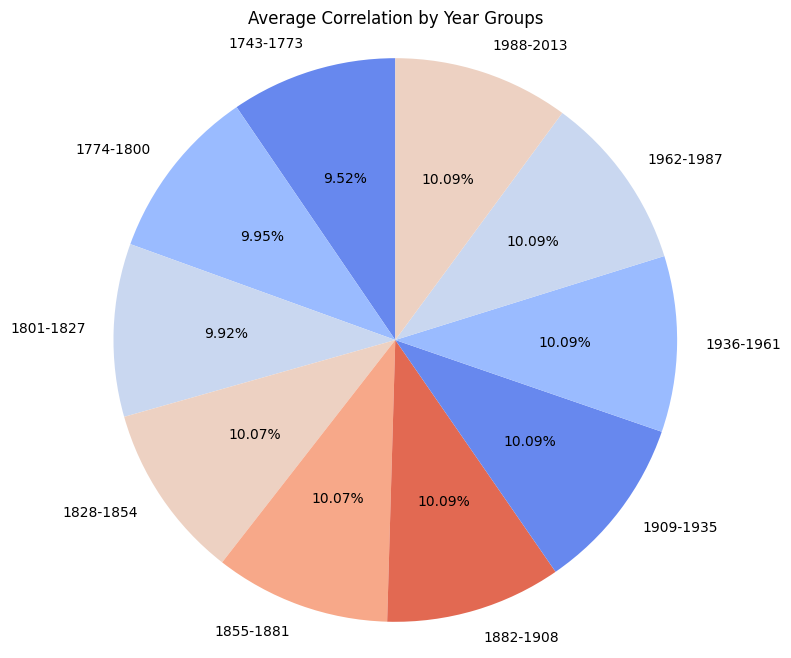

In [14]:
import matplotlib.pyplot as plt
df['dt'] = pd.to_datetime(df['dt'])

df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

pivot_data = df.pivot_table(index='Month', columns='Year', values='AverageTemperature')

correlation_matrix = pivot_data.corr()
average_correlation = correlation_matrix.mean()

average_correlation = average_correlation.fillna(0)

years_divided = np.array_split(average_correlation.index, 10)

average_correlation_grouped = [average_correlation[years].mean() for years in years_divided]

plt.figure(figsize=(8, 8))
plt.pie(average_correlation_grouped, labels=[f'{years[0]}-{years[-1]}' for years in years_divided], autopct='%.2f%%', startangle=90, colors=sns.color_palette('coolwarm'))
plt.title('Average Correlation by Year Groups')
plt.axis('equal')
plt.show()

#### Visualise the data

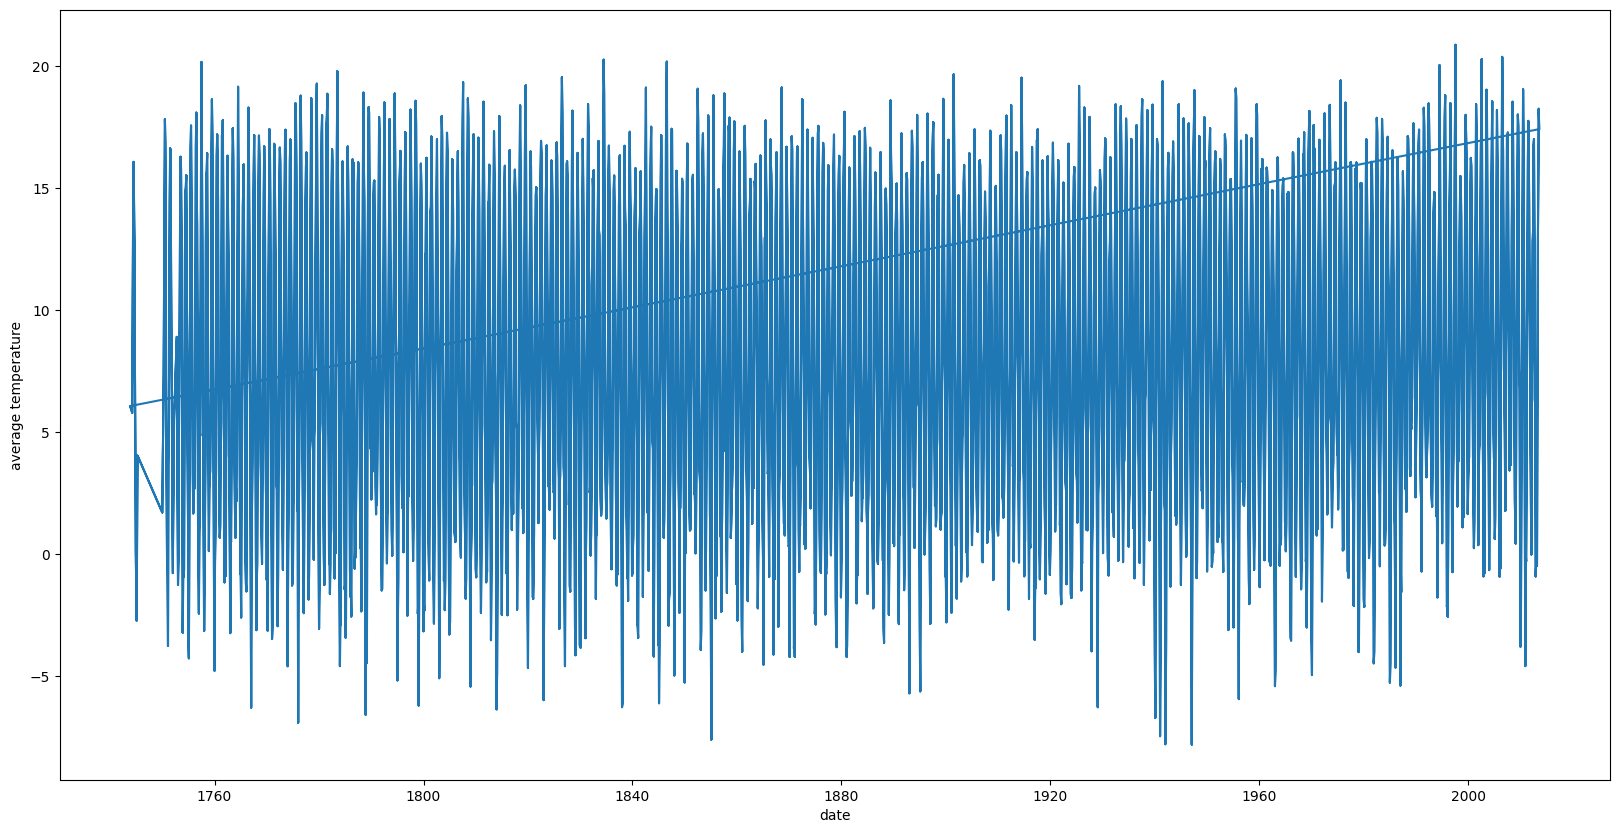

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("date")
ax1.set_ylabel("average temperature")
ax1.plot(ts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sorted_df = df.sort_values(by='AverageTemperature', ascending=False).head(50)
sns.lineplot(x='dt', y='AverageTemperature', data=sorted_df)
plt.xticks(rotation=45)
plt.title('Top 50 Average Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

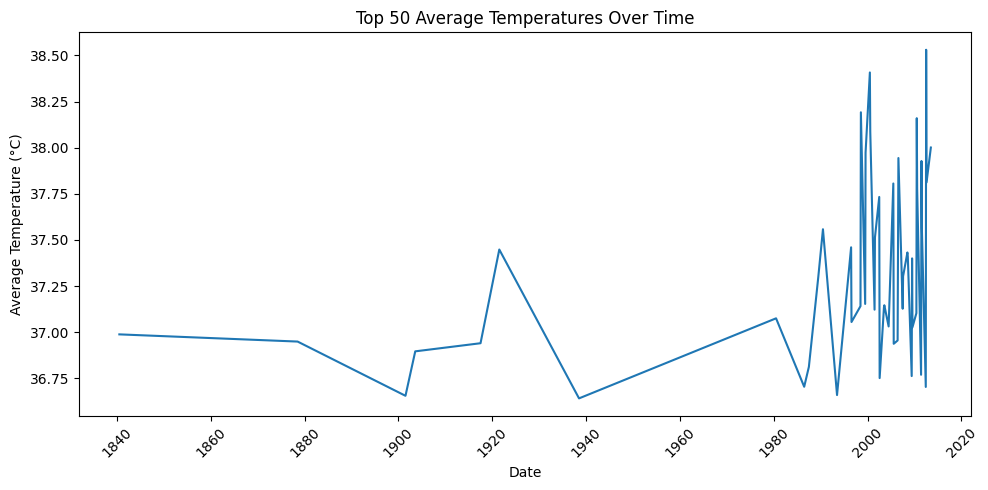

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sorted_df = df.sort_values(by='AverageTemperature', ascending=False).head(50)
sns.lineplot(x='dt', y='AverageTemperature', data=sorted_df)
plt.xticks(rotation=45)
plt.title('Top 50 Average Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

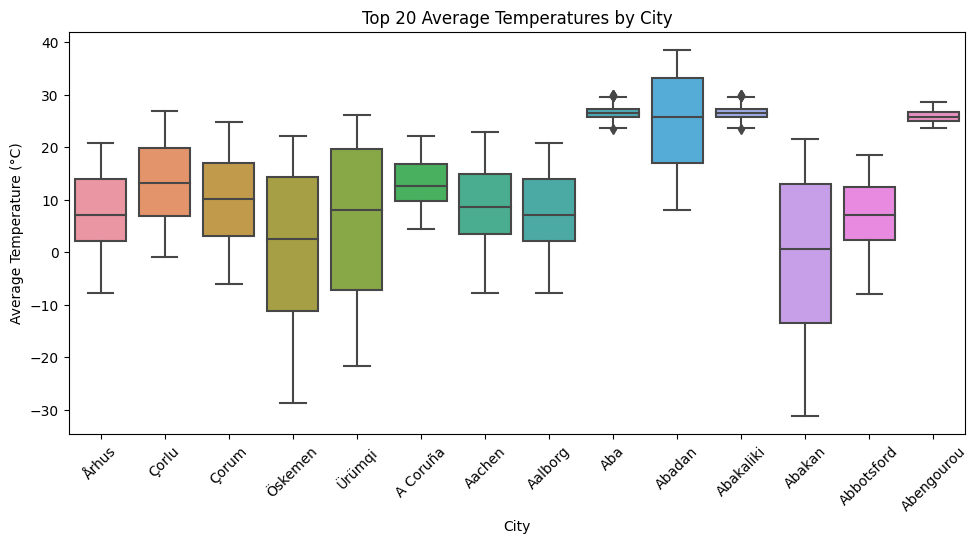

In [ ]:
plt.figure(figsize=(10, 5))
sorted_df = df.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False).head(20)
sns.boxplot(x='City', y='AverageTemperature', data=df[df['City'].isin(sorted_df.index)])
plt.title('Top 20 Average Temperatures by City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

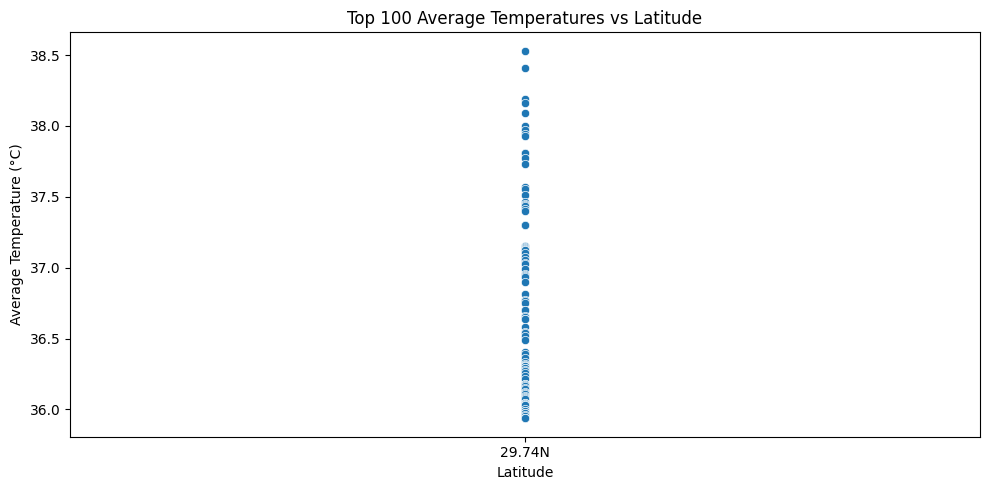

In [ ]:
plt.figure(figsize=(10, 5))
sorted_df = df.sort_values(by='AverageTemperature', ascending=False).head(100)
sns.scatterplot(x='Latitude', y='AverageTemperature', data=sorted_df)
plt.title('Top 100 Average Temperatures vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

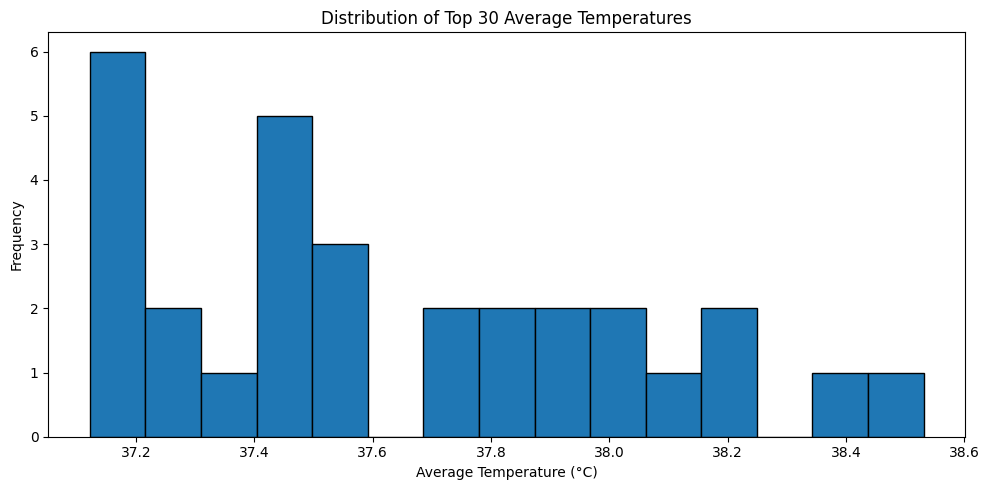

In [ ]:
plt.figure(figsize=(10, 5))
sorted_df = df.sort_values(by='AverageTemperature', ascending=False).head(30)
plt.hist(sorted_df['AverageTemperature'], bins=15, edgecolor='black')
plt.title('Distribution of Top 30 Average Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

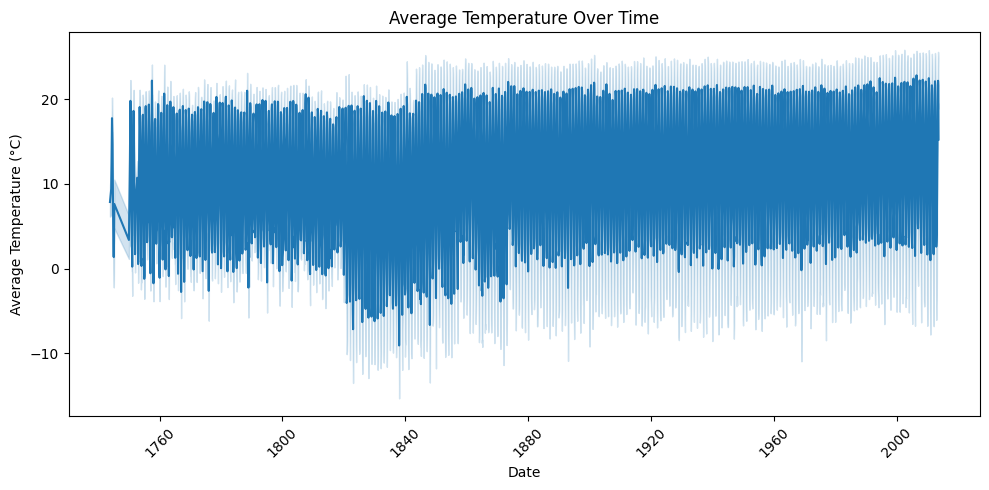

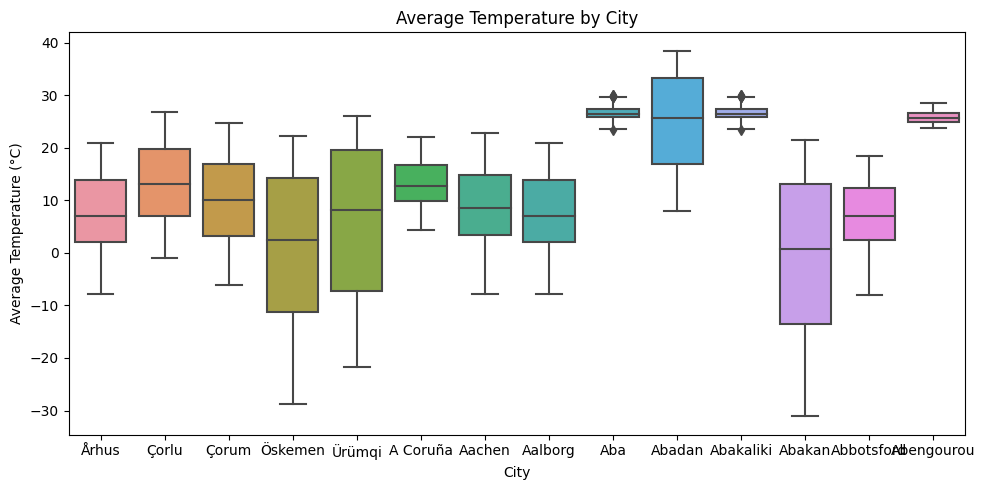

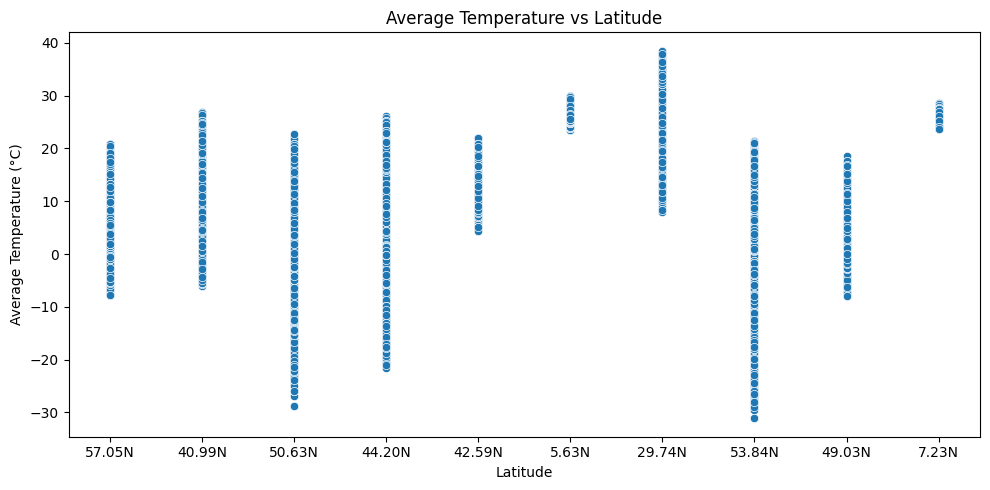

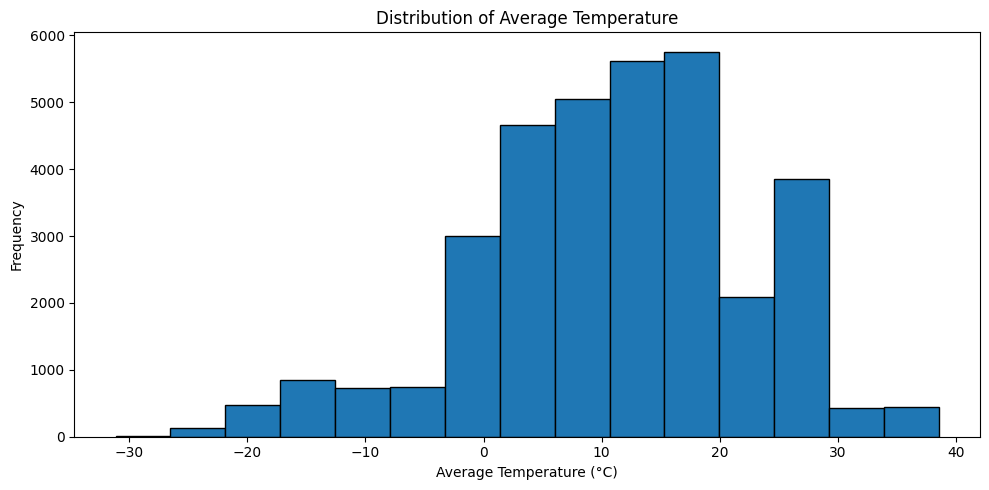

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='dt', y='AverageTemperature', data=df)
plt.xticks(rotation=45)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='City', y='AverageTemperature', data=df)
plt.title('Average Temperature by City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Latitude', y='AverageTemperature', data=df)
plt.title('Average Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['AverageTemperature'], bins=15, edgecolor='black')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Checking the value for Null Hypothesis**

In [15]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic:{adf_result[0]}')
print(f'p-value:{adf_result[1]}')

for percentage,value in adf_result[4].items():
    print("Critical Value:")
    print(f'{percentage}{value}')

ADF Statistic:-9.878337284067818
p-value:3.8289557725808896e-17
Critical Value:
1%-3.4313889022895148
Critical Value:
5%-2.8619991032862404
Critical Value:
10%-2.567014377653714


### Autoregressive Moving Average (ARMA) Model

In [16]:
from statsmodels.tsa.arima.model import ARIMA

newmodel = ARIMA(ts, order =(1,0,1))

results = newmodel.fit()
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

dt
1990-01-01     2.873385
1990-02-01     5.770736
1990-03-01     6.404132
1990-04-01     6.922930
1990-05-01     8.503291
1990-06-01    13.677691
1990-07-01    14.591581
1990-08-01    15.588709
1990-09-01    15.803934
1990-10-01     9.703536
1990-11-01     8.843079
1990-12-01     2.723562
1991-01-01     3.757241
Name: predicted_mean, dtype: float64

### Model Evaluation

In [17]:
actuals = df_denmark['01/01/1990':'01/01/1991']['AverageTemperature'][0:13]
actuals

dt
1990-01-01     4.267
1990-02-01     5.895
1990-03-01     6.565
1990-04-01     8.068
1990-05-01    12.944
1990-06-01    15.672
1990-07-01    16.844
1990-08-01    17.402
1990-09-01    12.446
1990-10-01     9.409
1990-11-01     4.027
1990-12-01     2.547
1991-01-01     2.088
Name: AverageTemperature, dtype: float64

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13],predictions)
print(f'MAE:{mae}')

MAE:1.8183766727096908


### Model Tuning

In [19]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

p = range(0, 4)
d = 0
q = range(0, 4)

pq = itertools.product(p, q)

best_aic = float('inf')
best_order = None

for order in pq:
    try:
        model = ARIMA(ts, order=(*order, d))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARMA model: ARMA{best_order} - AIC: {best_aic:.2f}')


ARMA(0, 0) - AIC: 41789.29
ARMA(0, 1) - AIC: 34908.57
ARMA(0, 2) - AIC: 34131.54
ARMA(0, 3) - AIC: 39902.47
ARMA(1, 0) - AIC: 34360.80
ARMA(1, 1) - AIC: 32554.93
ARMA(1, 2) - AIC: 33739.75
ARMA(1, 3) - AIC: 36307.75
ARMA(2, 0) - AIC: 30080.78
ARMA(2, 1) - AIC: 32550.76
ARMA(2, 2) - AIC: 33684.81
ARMA(2, 3) - AIC: 35328.67
ARMA(3, 0) - AIC: 28024.37
ARMA(3, 1) - AIC: 31858.93
ARMA(3, 2) - AIC: 33664.67
ARMA(3, 3) - AIC: 35233.82
Best ARMA model: ARMA(3, 0) - AIC: 28024.37


In [20]:
newmodel = ARIMA(ts, order =(3,0,0))

results = newmodel.fit()
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')
predictions

dt
1990-01-01     0.789959
1990-02-01     5.346975
1990-03-01     8.492140
1990-04-01     8.241640
1990-05-01     8.982788
1990-06-01    13.787576
1990-07-01    16.058563
1990-08-01    14.833084
1990-09-01    14.029868
1990-10-01     8.261520
1990-11-01     4.578394
1990-12-01     1.436137
1991-01-01     1.254423
Name: predicted_mean, dtype: float64

In [21]:
predictions = results.predict(start = '01/01/1990',end = '01/01/1991')
mae = mean_absolute_error(actuals[0:13],predictions)
print(f'MAE:{mae}')

MAE:1.5810013461753447


In [22]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

time_steps = 10

def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = prepare_data(ts, time_steps)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [23]:
X_train.shape, X_test.shape

((5057, 10), (1265, 10))

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

predictions = model.predict(X_test)

predictions = predictions.flatten()
actual_values = y_test

lstm_mae = mean_absolute_error(actual_values, predictions)
lstm_mape = mean_absolute_percentage_error(actual_values, predictions)

print("LSTM Mean Absolute Error (MAE):", lstm_mae)
print("LSTM Mean Absolute Percentage Error (MAPE):", lstm_mape)

for i in range(len(actual_values)):
    print(f"Actual: {actual_values[i]}, Predicted: {predictions[i]}")


Epoch 1/50
159/159 [==============================] - 7s 17ms/step - loss: 23.2810
Epoch 2/50
159/159 [==============================] - 2s 12ms/step - loss: 3.5686
Epoch 3/50
159/159 [==============================] - 2s 13ms/step - loss: 3.3473
Epoch 4/50
159/159 [==============================] - 2s 13ms/step - loss: 3.3774
Epoch 5/50
159/159 [==============================] - 1s 8ms/step - loss: 3.2590
Epoch 6/50
159/159 [==============================] - 1s 7ms/step - loss: 3.3122
Epoch 7/50
159/159 [==============================] - 1s 7ms/step - loss: 3.2431
Epoch 8/50
159/159 [==============================] - 2s 10ms/step - loss: 3.1491
Epoch 9/50
159/159 [==============================] - 2s 10ms/step - loss: 3.1451
Epoch 10/50
159/159 [==============================] - 1s 7ms/step - loss: 3.1542
Epoch 11/50
159/159 [==============================] - 1s 7ms/step - loss: 3.1152
Epoch 12/50
159/159 [==============================] - 1s 6ms/step - loss: 3.0805
Epoch 13/50
159/15

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

lstm_mae = mean_absolute_error(actual_values, predictions)
lstm_mape = mean_absolute_percentage_error(actual_values, predictions)

print("LSTM Mean Absolute Error (MAE):", lstm_mae)
print("LSTM Mean Absolute Percentage Error (MAPE):", lstm_mape)


LSTM Mean Absolute Error (MAE): 1.3503008714145588
LSTM Mean Absolute Percentage Error (MAPE): 0.8134238078924431


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

print("Random Forest Mean Absolute Error (MAE):", rf_mae)
print("Random Forest Mean Absolute Percentage Error (MAPE):", rf_mape)

Random Forest Mean Absolute Error (MAE): 0.6697033754940708
Random Forest Mean Absolute Percentage Error (MAPE): 0.498605589738288


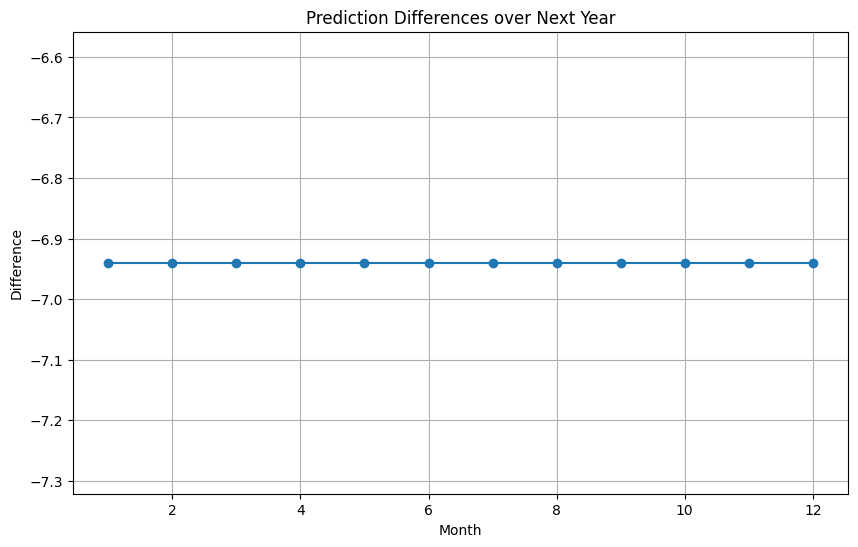

In [27]:
X_train = np.random.rand(5, 10)
y_train = np.array([2, 4, 6, 8, 10])

X_test = np.random.rand(2, 10)
y_test = np.array([12, 14])

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

forecast_periods = 12
next_year_months = np.arange(1, forecast_periods + 1).reshape(-1, 1)

X_future = np.repeat(X_test[-1:], forecast_periods, axis=0)
X_future[:, 0] = next_year_months.flatten()

next_year_predictions = rf_model.predict(X_future)


prediction_differences = next_year_predictions - y_test[-1]

difference_df = pd.DataFrame({"Month": np.arange(1, forecast_periods + 1), "Difference": prediction_differences})
difference_df.to_csv("prediction_differences.csv", index=False)

plt.figure(figsize=(10, 6))
plt.plot(difference_df["Month"], difference_df["Difference"], marker='o')
plt.xlabel("Month")
plt.ylabel("Difference")
plt.title("Prediction Differences over Next Year")
plt.grid(True)
plt.savefig("difference_graph.png")
plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)


gb_predictions = gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mape = mean_absolute_percentage_error(y_test, gb_predictions)

print("Gradient Boosting Mean Absolute Error (MAE):", gb_mae)
print("Gradient Boosting Mean Absolute Percentage Error (MAPE):", gb_mape)

Gradient Boosting Mean Absolute Error (MAE): 7.782330741330683
Gradient Boosting Mean Absolute Percentage Error (MAPE): 0.600522171895614


In [29]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

svr_predictions = svr_model.predict(X_test)

svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mape = mean_absolute_percentage_error(y_test, svr_predictions)

print("Support Vector Regression Mean Absolute Error (MAE):", svr_mae)
print("Support Vector Regression Mean Absolute Percentage Error (MAPE):", svr_mape)


Support Vector Regression Mean Absolute Error (MAE): 7.113868148318499
Support Vector Regression Mean Absolute Percentage Error (MAPE): 0.5446945042337437


In [30]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

print("XGBoost Mean Absolute Error (MAE):", xgb_mae)
print("XGBoost Mean Absolute Percentage Error (MAPE):", xgb_mape)

XGBoost Mean Absolute Error (MAE): 6.000633955001831
XGBoost Mean Absolute Percentage Error (MAPE): 0.4643392875081017


In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mape = mean_absolute_percentage_error(y_test, knn_predictions)

print("K-Nearest Neighbors Mean Absolute Error (MAE):", knn_mae)
print("K-Nearest Neighbors Mean Absolute Percentage Error (MAPE):", knn_mape)

K-Nearest Neighbors Mean Absolute Error (MAE): 7.0
K-Nearest Neighbors Mean Absolute Percentage Error (MAPE): 0.5357142857142857


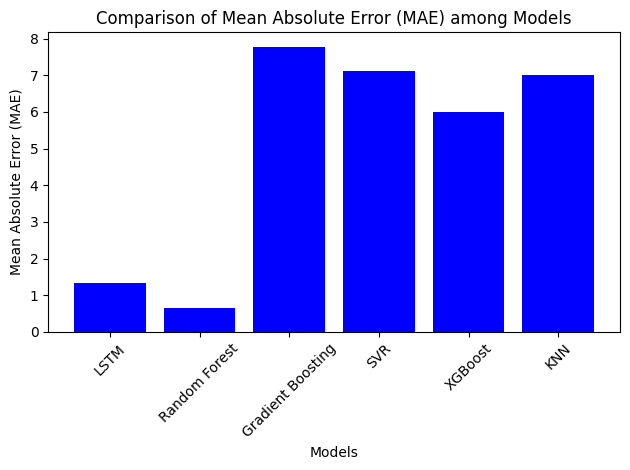

In [32]:
import matplotlib.pyplot as plt

models = ['LSTM', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost', 'KNN']
mae_scores = [1.32, 0.66, 7.78, 7.11, 6.00, 7.0]

plt.bar(models, mae_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
